In [318]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin


In [319]:
df = pd.read_csv('D:/Reza Mashayekhi_ML/housing.csv')
df.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [263]:
df['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [264]:
df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [265]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [266]:
df['population'][df['ocean_proximity']== 'ISLAND']

8314     744.0
8315    1100.0
8316     733.0
8317     341.0
8318     422.0
Name: population, dtype: float64

In [267]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
longitude,20640.0,-119.569704,2.003532,-124.3500,-121.8000,-118.4900,-118.01000,-114.3100
latitude,20640.0,35.631861,2.135952,32.5400,33.9300,34.2600,37.71000,41.9500
housing_median_age,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
total_bedrooms,20433.0,537.870553,421.385070,1.0000,296.0000,435.0000,647.00000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000


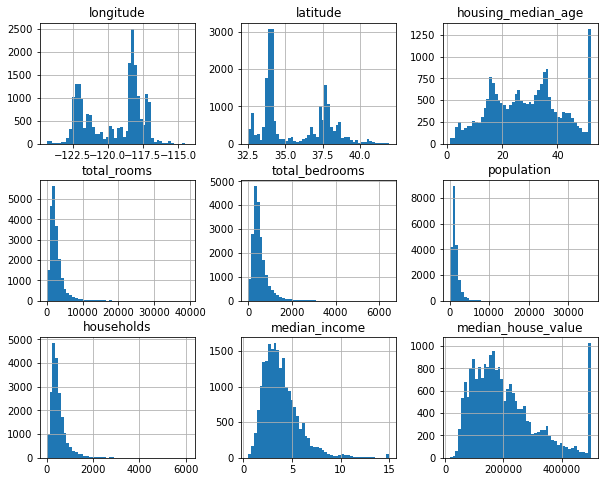

In [268]:
df.hist(bins = 50, figsize=(10,8))
plt.show()

In [320]:
train_set, test_set =train_test_split(df, test_size= 0.2, random_state= 42)

In [270]:
train_set.shape

(16512, 10)

In [271]:
data=train_set.copy()

# data Visualization

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

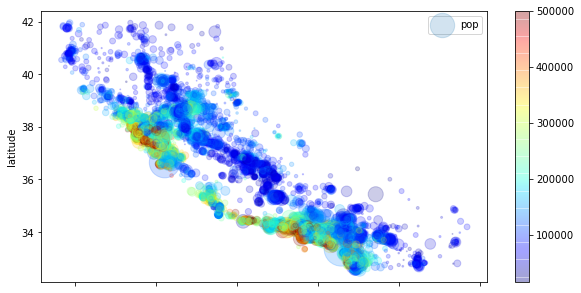

In [272]:
data.plot(kind ='scatter', x='longitude', y = 'latitude', figsize=(10,5), s= data['population']/30, label = 'pop',
          cmap = plt.get_cmap('jet'), c= data['median_house_value'], alpha = 0.2)

# Corr

In [273]:
cor_matrix= data.corr()
cor_matrix['median_house_value'].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.690647
total_rooms           0.133989
housing_median_age    0.103706
households            0.063714
total_bedrooms        0.047980
population           -0.026032
longitude            -0.046349
latitude             -0.142983
Name: median_house_value, dtype: float64

# Scatter_matrix

In [274]:
from pandas.plotting import scatter_matrix

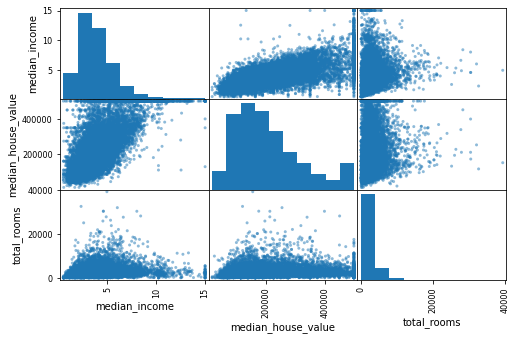

In [275]:
features= ['median_income', 'median_house_value', 'total_rooms']

scatter_matrix(data[features], figsize= (8,5))
plt.show()

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

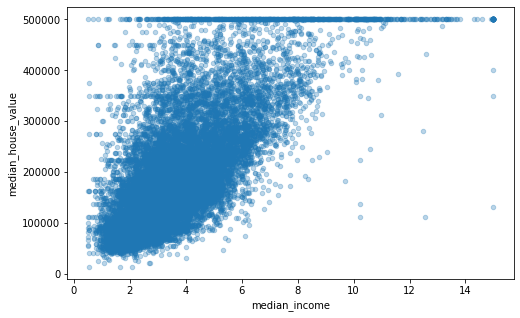

In [276]:
data.plot(kind= 'scatter', y = 'median_house_value', x= 'median_income', figsize = (8,5), alpha= 0.3)

# Feature Extraction

In [277]:
data['total_room_per_household']=data['total_rooms']/data['households']
data['total_bedrooms_per_total_rooms']= data['total_bedrooms']/data['total_rooms']
data['pop_per_household']=data['population']/data['households']

In [278]:
cor_data = data.corr()
cor_data['median_house_value'].sort_values(ascending = False)

median_house_value                1.000000
median_income                     0.690647
total_room_per_household          0.158485
total_rooms                       0.133989
housing_median_age                0.103706
households                        0.063714
total_bedrooms                    0.047980
pop_per_household                -0.022030
population                       -0.026032
longitude                        -0.046349
latitude                         -0.142983
total_bedrooms_per_total_rooms   -0.257419
Name: median_house_value, dtype: float64

In [279]:
df= train_set.copy()

In [280]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [281]:
X_train= df.drop('median_house_value', axis =1)

In [282]:
y_train = df['median_house_value']

In [283]:
df_num = X_train.drop('ocean_proximity', axis =1)
df_cat = X_train['ocean_proximity']
dframe_cat =pd.DataFrame(df_cat)
type(dframe_cat)

pandas.core.frame.DataFrame

In [284]:
df_num.isnull().any()

longitude             False
latitude              False
housing_median_age    False
total_rooms           False
total_bedrooms        False
population            False
households            False
median_income         False
dtype: bool

In [285]:
median = df_num['total_bedrooms'].median()

In [286]:
df_num['total_bedrooms'].fillna(median)

14196     627.0
8267      787.0
17445     331.0
14265     367.0
2271      431.0
          ...  
11284     201.0
11964     570.0
5390      569.0
860       597.0
15795    1315.0
Name: total_bedrooms, Length: 16512, dtype: float64

# Imputer

In [321]:
from sklearn.impute import SimpleImputer

In [288]:
imputer =SimpleImputer(missing_values = np.nan, strategy = 'median')
X = imputer.fit_transform(df_num)

In [289]:
df_num_impute = pd.DataFrame(df_num, columns = df_num.columns)
df_num_impute

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542
...,...,...,...,...,...,...,...,...
11284,-117.96,33.78,35.0,1330.0,201.0,658.0,217.0,6.3700
11964,-117.43,34.02,33.0,3084.0,570.0,1753.0,449.0,3.0500
5390,-118.38,34.03,36.0,2101.0,569.0,1756.0,527.0,2.9344
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192


In [322]:
rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6

class CombineAttributeAdder(BaseEstimator, TransformerMixin):
    def fit(self, X,y=None):
        return self
    
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix]/X[:, household_ix]
        
        pop_per_household = X[:, population_ix]/X[:, household_ix]
        
        bedrooms_per_room = X[:, bedrooms_ix]/X[:, rooms_ix]
        
        return np.c_[X, rooms_per_household, pop_per_household, bedrooms_per_room]
    
custom = CombineAttributeAdder()

data_custom_tmp= custom.transform(df_num_impute.values)
df_custom_tmp = pd.DataFrame(data_custom_tmp)

df_num_impute_columns = list(df_num_impute.columns)

df_num_impute_columns.extend(['rooms_per_household', 'pop_per_household', 'bedrooms_per_room'])

df_custom_tmp.columns = df_num_impute_columns

df_custom_tmp



,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,pop_per_household,bedrooms_per_room
0,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,5.017657,3.691814,0.200576
1,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,4.473545,1.738095,0.232703
2,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,5.645833,2.723214,0.174486
3,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,4.002817,3.994366,0.258269
4,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,6.268421,2.300000,0.180940
...,...,...,...,...,...,...,...,...,...,...,...
16507,-117.96,33.78,35.0,1330.0,201.0,658.0,217.0,6.3700,6.129032,3.032258,0.151128
16508,-117.43,34.02,33.0,3084.0,570.0,1753.0,449.0,3.0500,6.868597,3.904232,0.184825
16509,-118.38,34.03,36.0,2101.0,569.0,1756.0,527.0,2.9344,3.986717,3.332068,0.270823
16510,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,6.395349,3.178891,0.166993


# Feature Scaling

In [291]:
df_custom_tmp.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,pop_per_household,bedrooms_per_room
count,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,-119.582290,35.643149,28.608285,2642.004784,538.496851,1426.453004,499.986919,3.880754,5.435235,3.096961,0.212858
std,2.005654,2.136665,12.602499,2174.646744,419.007096,1137.056380,380.967964,1.904294,2.387375,11.578744,0.057995
min,-124.350000,32.550000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,0.888889,0.692308,0.100000
25%,-121.810000,33.930000,18.000000,1454.000000,296.750000,789.000000,280.000000,2.566700,4.452055,2.428799,0.175178
50%,-118.510000,34.260000,29.000000,2129.000000,437.000000,1167.000000,410.000000,3.545800,5.235874,2.817240,0.202808
75%,-118.010000,37.720000,37.000000,3160.000000,647.000000,1726.000000,606.000000,4.773175,6.061037,3.280000,0.239501
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,141.909091,1243.333333,1.000000


In [323]:
from sklearn.preprocessing import StandardScaler

In [292]:
scaler = StandardScaler()
data_num_scaler_tr = pd.DataFrame(scaler.fit_transform(df_custom_tmp), columns= df_custom_tmp.columns)
data_num_scaler_tr.describe()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,pop_per_household,bedrooms_per_room
count,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04
mean,1.769754e-15,1.781790e-17,-9.136210e-17,1.422742e-17,-6.230212e-17,2.397684e-17,-3.663091e-17,-6.815177e-17,-1.842102e-16,3.818829e-17,-6.176422e-17
std,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00
min,-2.377207e+00,-1.447697e+00,-2.190766e+00,-1.214029e+00,-1.282826e+00,-1.251913e+00,-1.309827e+00,-1.775438e+00,-1.904386e+00,-2.076846e-01,-1.946041e+00
25%,-1.110749e+00,-8.018107e-01,-8.417859e-01,-5.463144e-01,-5.769692e-01,-5.606339e-01,-5.774595e-01,-6.900689e-01,-4.118373e-01,-5.770769e-02,-6.497310e-01
50%,5.346501e-01,-6.473597e-01,3.108328e-02,-2.359097e-01,-2.422392e-01,-2.281865e-01,-2.362132e-01,-1.758995e-01,-8.350905e-02,-2.415892e-02,-1.733004e-01
75%,7.839530e-01,9.720351e-01,6.658972e-01,2.382046e-01,2.589609e-01,2.634487e-01,2.782814e-01,4.686502e-01,2.621376e-01,1.580865e-02,4.594195e-01
max,2.628794e+00,2.951816e+00,1.856173e+00,1.686670e+01,1.409685e+01,3.012743e+01,1.465263e+01,5.839268e+00,5.716655e+01,1.071164e+02,1.357290e+01


In [325]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [294]:
encoder = LabelEncoder()
df_cat_encode = encoder.fit_transform(df_cat)
data_cat_encoded = pd.DataFrame(df_cat_encode, columns = ['ocean_proximity'])
data_cat_encoded

,ocean_proximity
0,4
1,4
2,4
3,4
4,1
...,...
16507,0
16508,1
16509,0
16510,0


In [296]:
ddf= df[['ocean_proximity']]
ddf

,ocean_proximity
14196,NEAR OCEAN
8267,NEAR OCEAN
17445,NEAR OCEAN
14265,NEAR OCEAN
2271,INLAND
...,...
11284,<1H OCEAN
11964,INLAND
5390,<1H OCEAN
860,<1H OCEAN


In [316]:
ohot = OneHotEncoder(sparse=False)
df_cat_ohot = ohot.fit_transform(df[['ocean_proximity']])
data_cat_ohot = pd.DataFrame(df_cat_ohot)

data_cat_ohot.columns = ohot.get_feature_names(['prox'])

data_cat_ohot.columns 

Index(['prox_<1H OCEAN', 'prox_INLAND', 'prox_ISLAND', 'prox_NEAR BAY',
       'prox_NEAR OCEAN'],
      dtype='object')

In [355]:
final = pd.concat([data_num_scaler_tr,data_cat_ohot], axis =1)
final

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,pop_per_household,bedrooms_per_room,prox_<1H OCEAN,prox_INLAND,prox_ISLAND,prox_NEAR BAY,prox_NEAR OCEAN
0,1.272587,-1.372811,0.348490,0.222569,0.211228,0.768276,0.322906,-0.326196,-0.174916,0.051376,-0.211785,0.0,0.0,0.0,0.0,1.0
1,0.709162,-0.876696,1.618118,0.340293,0.593094,-0.098901,0.672027,-0.035843,-0.402835,-0.117362,0.342185,0.0,0.0,0.0,0.0,1.0
2,-0.447603,-0.460146,-1.952710,-0.342597,-0.495226,-0.449818,-0.430461,0.144701,0.088216,-0.032280,-0.661658,0.0,0.0,0.0,0.0,1.0
3,1.232698,-1.382172,0.586545,-0.561490,-0.409306,-0.007434,-0.380587,-1.017864,-0.600015,0.077507,0.783032,0.0,0.0,0.0,0.0,1.0
4,-0.108551,0.532084,1.142008,-0.119565,-0.256559,-0.485877,-0.314962,-0.171488,0.349007,-0.068832,-0.550364,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16507,0.808883,-0.872016,0.507194,-0.603337,-0.805492,-0.675847,-0.742833,1.307215,0.290620,-0.005588,-1.064430,1.0,0.0,0.0,0.0,0.0
16508,1.073144,-0.759688,0.348490,0.203255,0.075188,0.287195,-0.133839,-0.436266,0.600411,0.069722,-0.483382,0.0,1.0,0.0,0.0,0.0
16509,0.599469,-0.755007,0.586545,-0.248786,0.072801,0.289833,0.070909,-0.496973,-0.606759,0.020306,0.999514,1.0,0.0,0.0,0.0,0.0
16510,-1.185540,0.906510,-1.079841,0.429046,0.139628,0.308303,0.154908,0.965450,0.402175,0.007076,-0.790862,1.0,0.0,0.0,0.0,0.0


# Pipeline

In [326]:
from sklearn.pipeline import FeatureUnion
from sklearn.pipeline import Pipeline

In [367]:
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
        
    def fit(self, x, y=None):
        return self
    
    def transform(self, x, y=None):
        return x[self.attribute_names].values
    
df = train_set.copy()
df_X= df.drop('median_house_value', axis = 1)
df_label= df['median_house_value']
df_num= df_X.drop(['ocean_proximity'], axis=1)
num_attrs = list(df_num)

num_pipeline = Pipeline([('selector', DataFrameSelector(num_attrs)),
                     ('imputer', SimpleImputer(missing_values= np.nan, strategy= 'median')),
                     ('attributeAdder', CombineAttributeAdder()),
                     ('std_scaler', StandardScaler())])

df_cat_attrs = ['ocean_proximity']

cat_pipeline =Pipeline([('selector', DataFrameSelector(df_cat_attrs)),('one_hot', OneHotEncoder(sparse=False))])

full_pipeline = FeatureUnion(transformer_list = [('num_pipeline', num_pipeline), ('cat_pipeline', cat_pipeline)])

housing_prepared = full_pipeline.fit_transform(df)

housing_prepared_df = pd.DataFrame(housing_prepared, columns = ['longitude', 'latitude', 'housing_median_age',
                                                                'total_rooms', 'total_bedrooms', 'population', 'households',
                                                                'median_income', 'rooms_per_household', 'pop_per_household',
                                                                'bedrooms_per_room', 'prox_<1H OCEAN', 'prox_INLAND',
                                                                'prox_ISLAND', 'prox_NEAR BAY','prox_NEAR OCEAN'])

housing_prepared_df


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,pop_per_household,bedrooms_per_room,prox_<1H OCEAN,prox_INLAND,prox_ISLAND,prox_NEAR BAY,prox_NEAR OCEAN
0,1.272587,-1.372811,0.348490,0.222569,0.211228,0.768276,0.322906,-0.326196,-0.174916,0.051376,-0.211785,0.0,0.0,0.0,0.0,1.0
1,0.709162,-0.876696,1.618118,0.340293,0.593094,-0.098901,0.672027,-0.035843,-0.402835,-0.117362,0.342185,0.0,0.0,0.0,0.0,1.0
2,-0.447603,-0.460146,-1.952710,-0.342597,-0.495226,-0.449818,-0.430461,0.144701,0.088216,-0.032280,-0.661658,0.0,0.0,0.0,0.0,1.0
3,1.232698,-1.382172,0.586545,-0.561490,-0.409306,-0.007434,-0.380587,-1.017864,-0.600015,0.077507,0.783032,0.0,0.0,0.0,0.0,1.0
4,-0.108551,0.532084,1.142008,-0.119565,-0.256559,-0.485877,-0.314962,-0.171488,0.349007,-0.068832,-0.550364,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16507,0.808883,-0.872016,0.507194,-0.603337,-0.805492,-0.675847,-0.742833,1.307215,0.290620,-0.005588,-1.064430,1.0,0.0,0.0,0.0,0.0
16508,1.073144,-0.759688,0.348490,0.203255,0.075188,0.287195,-0.133839,-0.436266,0.600411,0.069722,-0.483382,0.0,1.0,0.0,0.0,0.0
16509,0.599469,-0.755007,0.586545,-0.248786,0.072801,0.289833,0.070909,-0.496973,-0.606759,0.020306,0.999514,1.0,0.0,0.0,0.0,0.0
16510,-1.185540,0.906510,-1.079841,0.429046,0.139628,0.308303,0.154908,0.965450,0.402175,0.007076,-0.790862,1.0,0.0,0.0,0.0,0.0


# Model Selection

In [365]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [368]:
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared_df, df_label)

housing_pred = lin_reg.predict(housing_prepared_df)

lin_mse= mean_squared_error(df_label, housing_pred)
lin_rmse= np.sqrt(lin_mse)

lin_rmse

67593.20745775253

In [369]:
from sklearn.tree import DecisionTreeRegressor

In [370]:
tree_reg=DecisionTreeRegressor()
tree_reg.fit(housing_prepared_df, df_label)

housing_tree_pred = tree_reg.predict(housing_prepared_df)

tree_mse = mean_squared_error(df_label, housing_tree_pred)

tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [371]:
from sklearn.model_selection import cross_val_score

In [379]:
scores = cross_val_score(tree_reg, housing_prepared_df, df_label, scoring='neg_mean_squared_error', cv =10)

tree_rmse_neg= np.sqrt(-scores)

def score_display(scores, model_name):
    print('------', model_name,'------')
    print('mean:', scores.mean())
    print('std:', scores.std())
    
score_display(tree_rmse_neg, tree_reg)

------ DecisionTreeRegressor() ------
mean: 68231.93908511565
std: 2471.5499338409986


In [380]:
from sklearn.ensemble import RandomForestRegressor

In [382]:
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared_df, df_label)

forest_score= cross_val_score(forest_reg, housing_prepared_df, df_label, cv=10, scoring ='neg_mean_squared_error')

forest_rmse_score = np.sqrt(-forest_score)

score_display(forest_rmse_score, forest_reg)

------ RandomForestRegressor() ------
mean: 49807.59323594928
std: 1937.6552921835685


# Grid Search

In [383]:
from sklearn.model_selection import GridSearchCV

In [384]:
param_grid =[{'n_estimators': [3, 4, 6, 10, 30], 'max_features': [2, 6, 8, 15]}]

grid_cv= GridSearchCV(forest_reg, param_grid, cv= 5, scoring= 'neg_mean_squared_error')

grid_cv.fit(housing_prepared_df, df_label)
print('Best_params:', grid_cv.best_params_)
print('Best_estimator:', grid_cv.best_estimator_)

Best_params: {'max_features': 6, 'n_estimators': 30}
Best_estimator: RandomForestRegressor(max_features=6, n_estimators=30)


# Best Score

In [387]:
Final_model = grid_cv.best_estimator_

X_test= test_set.drop('median_house_value', axis=1)
y_test = test_set['median_house_value'].copy()

X_prepared = full_pipeline.transform(X_test)
final_pred = Final_model.predict(X_prepared)

final_mse= mean_squared_error(y_test, final_pred)

final_rmse = np.sqrt(final_mse)
final_rmse

49443.47496830555